In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


iris = load_iris()

X = iris.data       
y = iris.target     

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})



In [4]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [5]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)   
count         150.000000        150.000000         150.000000  \
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


calcul de k avec la methode du coude

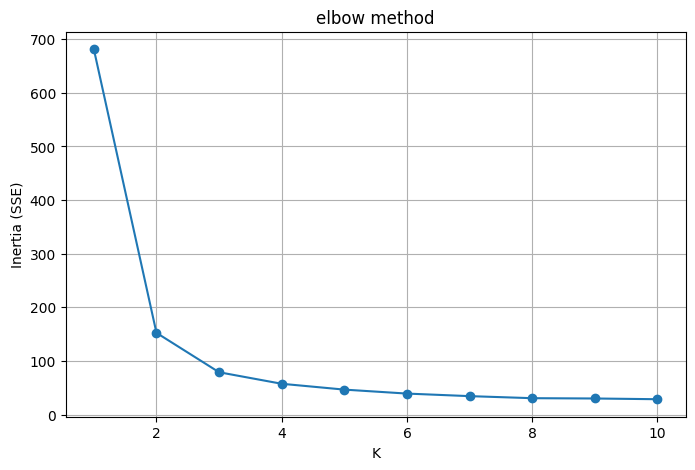

In [16]:
inertias = []

# Tester de K = 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title("elbow method")
plt.xlabel("K")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()

L'inertie est la somme des distances au carré entre chaque point et le centroïde de son cluster. Plus l'inertie est élevé et plus les points seront eloignés les uns des autres . Plus le nombre k augmente et moins l'inertie diminue . Il faut donc prendre le bon nombre k 



entrainement du modèle

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)  # n_clusters = nombre de groupes souhaités
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

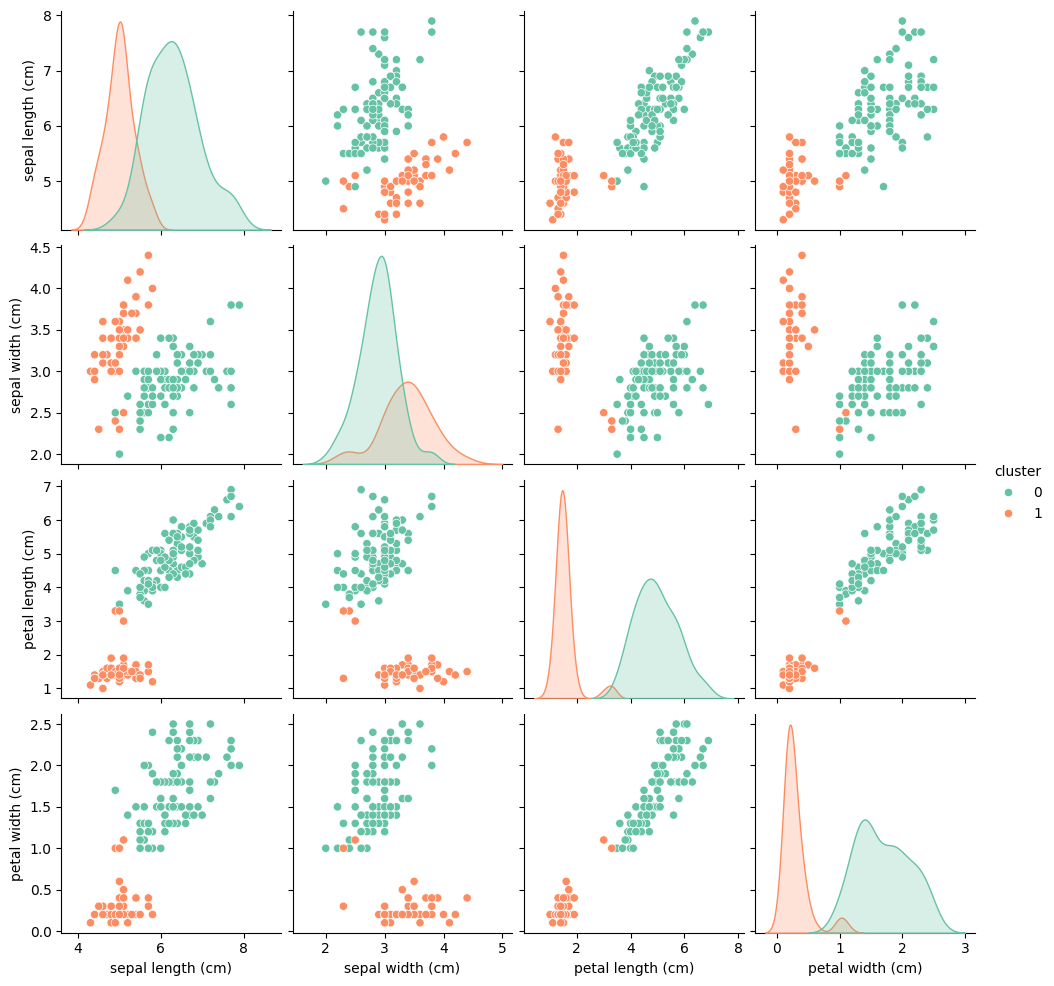

In [14]:
# Labels de cluster attribués à chaque point
labels = kmeans.labels_

# Coordonnées des centroïdes
centroids = kmeans.cluster_centers_

# Affichage des clusters
df = pd.DataFrame(X, columns=iris.feature_names)
df['cluster'] = labels

sns.pairplot(df, hue='cluster', palette='Set2')
plt.show()